# Python for Data 1: Descriptive Statistics

Descriptive statistics are measures that summarize important features of data, often with a single number. Producing descriptive statistics is a common first step to take after cleaning and preparing a data set for analysis. We've already seen several examples of deceptive statistics in earlier lessons, such as means and medians. In this lesson, we'll review some of these functions and explore several new ones.

## Measures of Center

Measures of center are statistics that give us a sense of the "middle" of a numeric variable. In other words, centrality measures give you a sense of a typical value you'd expect to see. Common measures of center include the mean, median and mode.

The mean is simply an average: the sum of the values divided by the total number of records. As we've seen in previous lessons we can use df.mean() to get the mean of each column in a DataFrame:

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Mounting google drive folder, https://medium.com/@sourabh.colab/read-csv-file-in-google-colab-in-3-steps-761d65bba9e7
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Select the appropiate path from the left panel
path='/content/drive/MyDrive/CEU Máster Big Data/1 Herramientas de analisis estadistico /Practica1_mtcars.csv'
mtcars = pd.read_csv(path)
mtcars =  mtcars.rename(columns={'Unnamed: 0': 'model'})
mtcars.index = mtcars.model
del mtcars["model"]

mtcars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [ ]:
mtcars.mean()                 # Get the mean of each column

,0
mpg,20.090625
cyl,6.187500
disp,230.721875
hp,146.687500
drat,3.596563
wt,3.217250
qsec,17.848750
vs,0.437500
am,0.406250
gear,3.687500


We can also get the means of each row by supplying an axis argument:

In [ ]:
mtcars.mean(axis=1)           # Get the mean of each row

,0
model,
Mazda RX4,29.907273
Mazda RX4 Wag,29.981364
Datsun 710,23.598182
Hornet 4 Drive,38.739545
Hornet Sportabout,53.664545
Valiant,35.049091
Duster 360,59.720000
Merc 240D,24.634545
Merc 230,27.233636


The median of a distribution is the value where 50% of the data lies below it and 50% lies above it. In essence, the median splits the data in half. The median is also known as the 50% percentile since 50% of the observations are found below it. As we've seen previously, you can get the median using the df.median() function:

In [ ]:
mtcars.median()                 # Get the median of each column

,0
mpg,19.200
cyl,6.000
disp,196.300
hp,123.000
drat,3.695
wt,3.325
qsec,17.710
vs,0.000
am,0.000
gear,4.000


Again, we could get the row medians across each row by supplying the argument axis=1.

Although the mean and median both give us some sense of the center of a distribution, they aren't always the same. The median always gives us a value that splits the data into two halves while the mean is a numeric average so extreme values can have a significant impact on the mean. In a symmetric distribution, the mean and median will be the same. Let's investigate with a density plot:

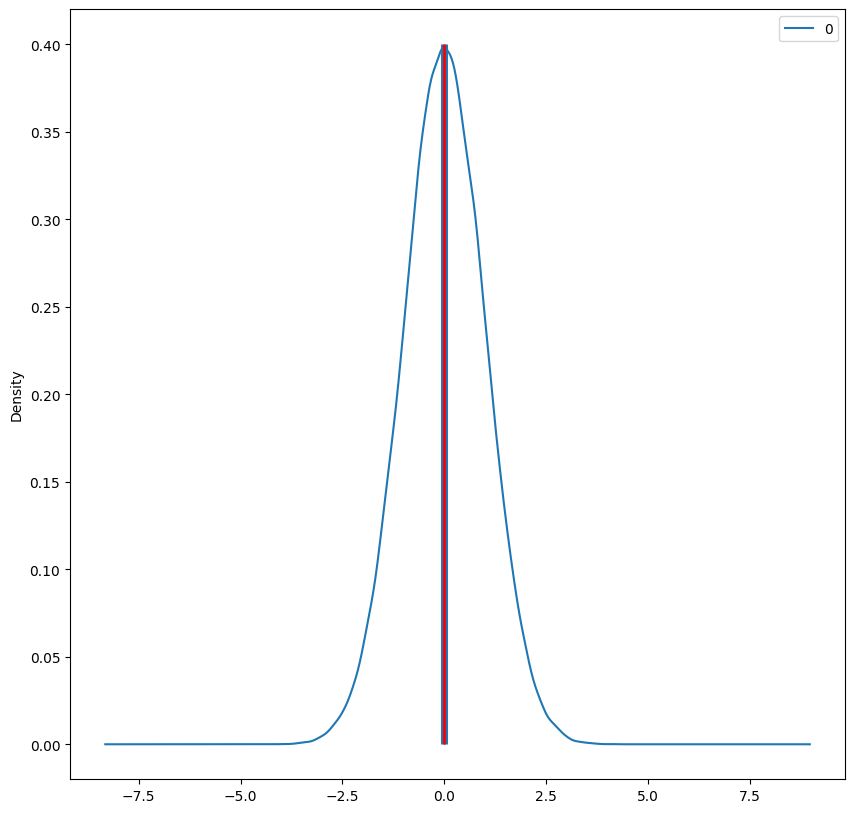

In [ ]:
norm_data = pd.DataFrame(np.random.normal(size=100000))

norm_data.plot(kind="density",
              figsize=(10,10));


plt.vlines(norm_data.mean(),     # Plot blue line at mean
           ymin=0,
           ymax=0.4,
           linewidth=5.0);

plt.vlines(norm_data.median(),   # Plot red line at median
           ymin=0,
           ymax=0.4,
           linewidth=2.0,
           color="red");

In the plot above the mean and median are both so close to zero that the red median line lies on top of the thicker black line drawn at the mean.

In skewed distributions, the mean tends to get pulled in the direction of the skew, while the median tends to resist the effects of skew:

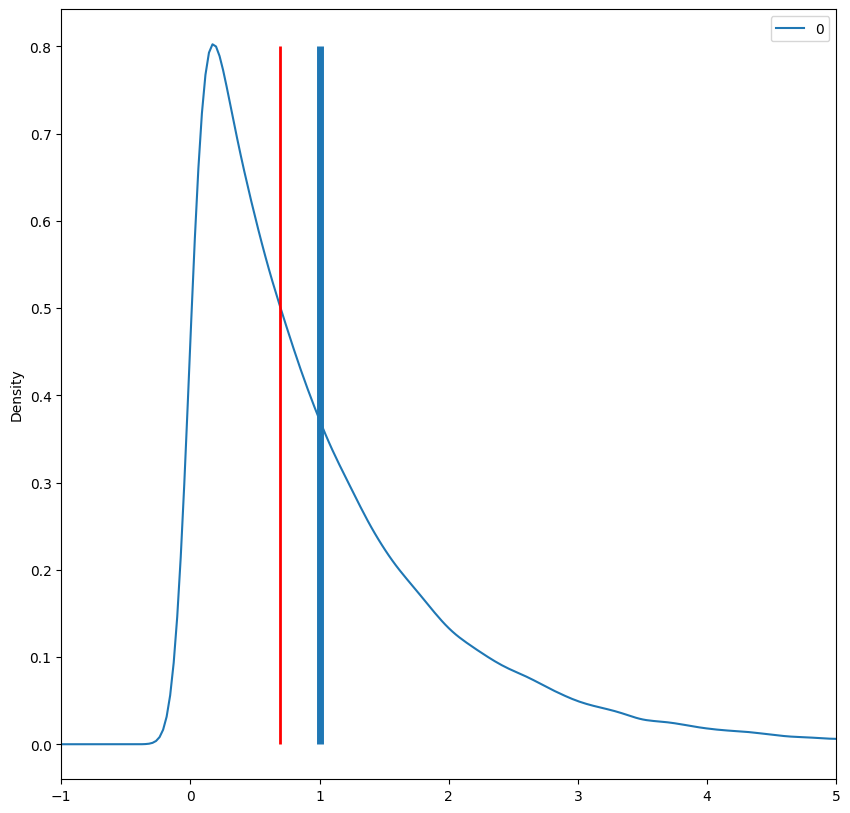

In [ ]:
skewed_data = pd.DataFrame(np.random.exponential(size=100000))

skewed_data.plot(kind="density",
              figsize=(10,10),
              xlim=(-1,5));


plt.vlines(skewed_data.mean(),     # Plot blue line at mean
           ymin=0,
           ymax=0.8,
           linewidth=5.0);

plt.vlines(skewed_data.median(),   # Plot red line at median
           ymin=0,
           ymax=0.8,
           linewidth=2.0,
           color="red");

The mean is also influenced heavily by outliers, while the median resists the influence of outliers:

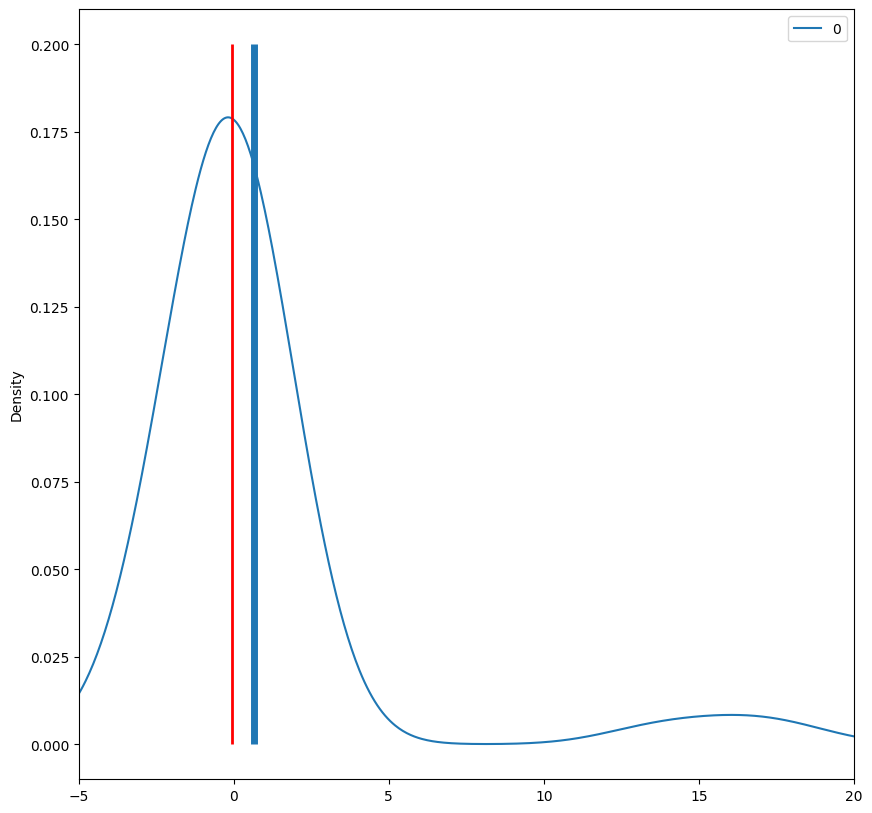

In [ ]:
norm_data = np.random.normal(size=50)
outliers = np.random.normal(15, size=3)
combined_data = pd.DataFrame(np.concatenate((norm_data, outliers), axis=0))

combined_data.plot(kind="density",
              figsize=(10,10),
              xlim=(-5,20));


plt.vlines(combined_data.mean(),     # Plot blue line at mean
           ymin=0,
           ymax=0.2,
           linewidth=5.0);

plt.vlines(combined_data.median(),   # Plot red line at median
           ymin=0,
           ymax=0.2,
           linewidth=2.0,
           color="red");

Since the median tends to resist the effects of skewness and outliers, it is known a "robust" statistic. The median generally gives a better sense of the typical value in a distribution with significant skew or outliers.

The mode of a variable is simply the value that appears most frequently. Unlike mean and median, you can take the mode of a categorical variable and it is possible to have multiple modes. Find the mode with df.mode():

In [ ]:
mtcars.mode()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,10.4,8.0,275.8,110.0,3.07,3.44,17.02,0.0,0.0,3.0,2.0
1,15.2,NaN,NaN,175.0,3.92,NaN,18.90,NaN,NaN,NaN,4.0
2,19.2,NaN,NaN,180.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,21.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,22.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,30.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The columns with multiple modes (multiple values with the same count) return multiple values as the mode. Columns with no mode (no value that appears more than once) return NaN.

## Measures of Spread

Measures of spread (dispersion) are statistics that describe how data varies. While measures of center give us an idea of the typical value, measures of spread give us a sense of how much the data tends to diverge from the typical value.

One of the simplest measures of spread is the range. Range is the distance between the maximum and minimum observations:

In [ ]:
max(mtcars["mpg"]) - min(mtcars["mpg"])

23.5

As noted earlier, the median represents the 50th percentile of a data set. A summary of several percentiles can be used to describe a variable's spread. We can extract the minimum value (0th percentile), first quartile (25th percentile), median, third quartile(75th percentile) and maximum value (100th percentile) using the quantile() function:

In [ ]:
five_num = [mtcars["mpg"].quantile(0),
            mtcars["mpg"].quantile(0.25),
            mtcars["mpg"].quantile(0.50),
            mtcars["mpg"].quantile(0.75),
            mtcars["mpg"].quantile(1)]

five_num

[10.4, 15.425, 19.2, 22.8, 33.9]

Since these values are so commonly used to describe data, they are known as the "five number summary". They are the same percentile values returned by df.describe():

In [ ]:
mtcars["mpg"].describe()

,mpg
count,32.000000
mean,20.090625
std,6.026948
min,10.400000
25%,15.425000
50%,19.200000
75%,22.800000
max,33.900000


Interquartile (IQR) range is another common measure of spread. IQR is the distance between the 3rd quartile and the 1st quartile:

In [ ]:
mtcars["mpg"].quantile(0.75) - mtcars["mpg"].quantile(0.25)

7.375

The boxplots we learned to create in the lesson on plotting are just visual representations of the five number summary and IQR:

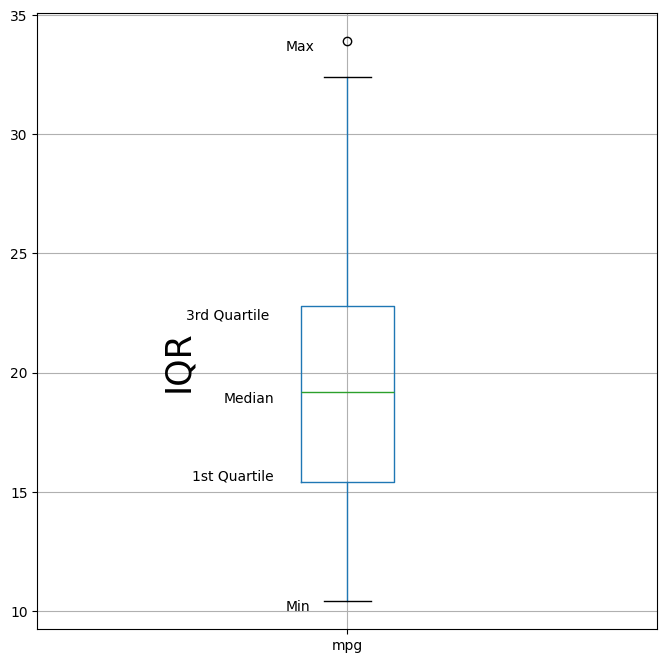

In [ ]:
mtcars.boxplot(column="mpg",
               return_type='axes',
               figsize=(8,8))

plt.text(x=0.74, y=22.25, s="3rd Quartile")
plt.text(x=0.8, y=18.75, s="Median")
plt.text(x=0.75, y=15.5, s="1st Quartile")
plt.text(x=0.9, y=10, s="Min")
plt.text(x=0.9, y=33.5, s="Max")
plt.text(x=0.7, y=19.5, s="IQR", rotation=90, size=25);

Variance and standard deviation are two other common measures of spread. The variance of a distribution is the average of the squared deviations (differences) from the mean. Use df.var() to check variance:

In [ ]:
mtcars["mpg"].var()

36.32410282258065


The standard deviation is the square root of the variance. Standard deviation can be more interpretable than variance, since the standard deviation is expressed in terms of the same units as the variable in question while variance is expressed in terms of units squared. Use df.std() to check the standard deviation:

In [ ]:
mtcars["mpg"].std()

6.026948052089105

Since variance and standard deviation are both derived from the mean, they are susceptible to the influence of data skew and outliers. Median absolute deviation is an alternative measure of spread based on the median, which inherits the median's robustness against the influence of skew and outliers. It is the median of the absolute value of the deviations from the median:

In [ ]:
abs_median_devs = abs(mtcars["mpg"] - mtcars["mpg"].median())

abs_median_devs.median() * 1.4826

5.411490000000001

*Note: The MAD is often multiplied by a scaling factor of 1.4826.*

## Skewness and Kurtosis

Beyond measures of center and spread, descriptive statistics include measures that give you a sense of the shape of a distribution. Skewness measures the skew or asymmetry of a distribution while kurtosis measures how much data is in the tails of a distribution v.s. the center. We won't go into the exact calculations behind skewness and kurtosis, but they are essentially just statistics that take the idea of variance a step further: while variance involves squaring deviations from the mean, skewness involves cubing deviations from the mean and kurtosis involves raising deviations from the mean to the 4th power.

Pandas has built in functions for checking skewness and kurtosis, df.skew() and df.kurt() respectively:

In [ ]:
mtcars["mpg"].skew()  # Check skewness

0.6723771376290805

In [ ]:
mtcars["mpg"].kurt()  # Check kurtosis

-0.0220062914240855

To explore these two measures further, let's create some dummy data and inspect it:

In [ ]:
norm_data = np.random.normal(size=100000)
skewed_data = np.concatenate((np.random.normal(size=35000)+2,
                             np.random.exponential(size=65000)),
                             axis=0)
uniform_data = np.random.uniform(0,2, size=100000)
peaked_data = np.concatenate((np.random.exponential(size=50000),
                             np.random.exponential(size=50000)*(-1)),
                             axis=0)

data_df = pd.DataFrame({"norm":norm_data,
                       "skewed":skewed_data,
                       "uniform":uniform_data,
                       "peaked":peaked_data})

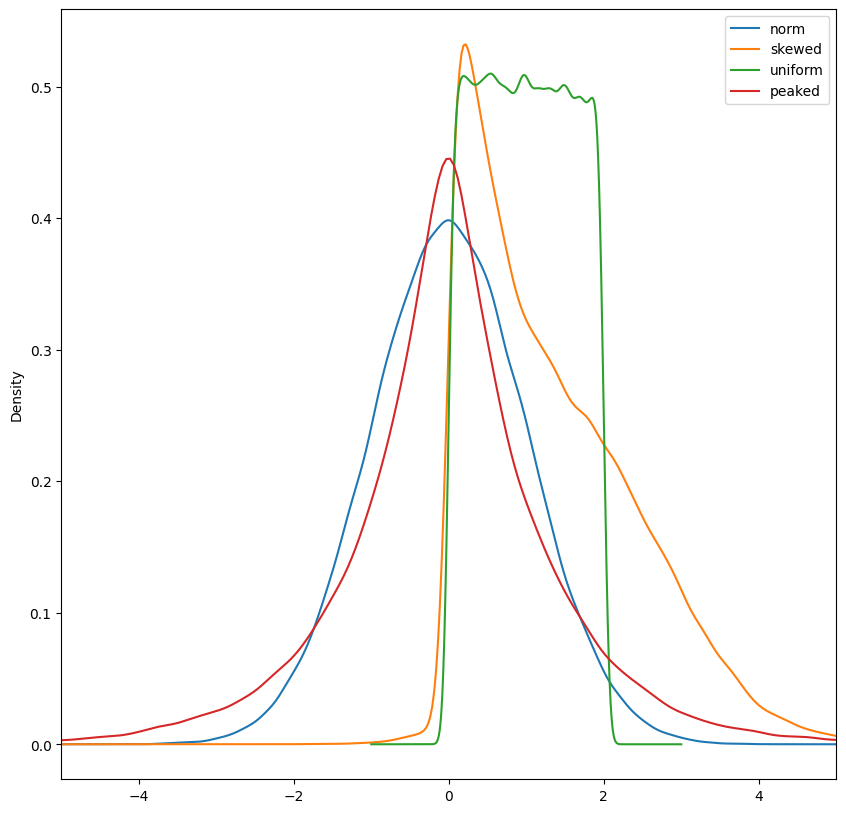

In [ ]:
data_df.plot(kind="density",
            figsize=(10,10),
            xlim=(-5,5));

Now let's check the skewness of each of the distributions. Since skewness measures asymmetry, we'd expect to see low skewness for all of the distributions except the skewed one, because all the others are roughly symmetric:

In [ ]:
data_df.skew()

,0
norm,0.006310
skewed,1.027298
uniform,0.011097
peaked,-0.040613


Now let's check kurtosis.

In [ ]:
data_df.kurt()

,0
norm,0.001420
skewed,1.402655
uniform,-1.197646
peaked,3.140578


As we can see from the output, the normally distributed data has a kurtosis near zero, the flat distribution has negative kurtosis and the two distributions with more data in the tails vs the center have higher kurtosis.

## Wrap Up

Descriptive statistics help you explore features of your data, like center, spread and shape by summarizing them with numerical measurements. Descriptive statistics help inform the direction of an analysis and let you communicate your insights to others quickly and succinctly. In addition, certain values, like the mean and variance, are used in all sorts of statistical tests and predictive models.

In this lesson, we generated a lot of random data to illustrate concepts, but we haven't actually learned much about the functions we've been using to generate random data. In the next lesson, we'll learn about probability distributions, including how to draw random data from them.

## Next Lesson: [Python for Data 22: Probability Distributions](https://www.kaggle.com/hamelg/python-for-data-22-probability-distributions)
[back to index](https://www.kaggle.com/hamelg/python-for-data-analysis-index)